### KNN Classifier : K-nearest-neighbors.
It is one of the simplest algorithm to start with.
The classifier will look for its closest K-points. K defines the number of neighboring points used to make a decision. By default it uses 5 K points to make the decision.

It is simple but does not do so well with larger data sets thats have hundred of features, it becomes very slow.

In [1]:
# pip3 install -U scikit-learn
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# pip3 install -U matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cancer = load_breast_cancer()

### sudo pip3 install mglearn

/usr/local/lib64/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


"\nLet's assume the blue circles represent malignant tumors as well the orange triangles \nare the benign ones, as they have been learned by our KNN classifier.\nStars are new sample.\nWhen we ask KNN to make a prediction or a decision or a classification of this new data point \nit will decide on the average of these three neighbors.\n"

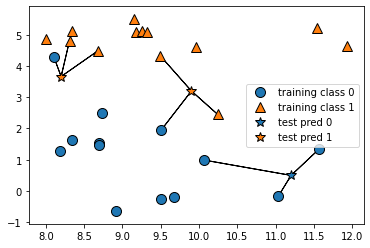

In [8]:
import mglearn
from sklearn.datasets import make_blobs

# We use 3 neighbors just for the illustration
mglearn.plots.plot_knn_classification(n_neighbors=3)

"""
Let's assume the blue circles represent malignant tumors as well the orange triangles 
are the benign ones, as they have been learned by our KNN classifier.
Stars are new sample.
When we ask KNN to make a prediction or a decision or a classification of this new data point 
it will decide on the average of these three neighbors.
"""

In [9]:
# Complete example for KNN

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

cancer = load_breast_cancer()

# Split the dataset
"""
1. stratify : data is split in a stratified fashion, using cancer.target as the class labels.
For example, if it is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=target will make sure that your random split has 25% of 0's and 75% of 1's.
2. random_state : controls the shuffling applied to the data before applying the split.
"""
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
# Let's evaluate the algorithm
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

# Accuracy of KNN n-5, on the test set: 0.930
# This means that KNN algorithm is able to correctly classify 93% of the tests data.
# This is a good score, but can we work with the parameters to make it even better ?

Accuracy of KNN n-5, on the training set: 0.946
Accuracy of KNN n-5, on the test set: 0.930


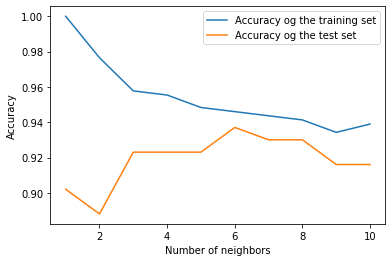

In [11]:
# Let's focus on neighbors number

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
# Display the results
plt.plot(neighbors_settings, training_accuracy, label='Accuracy og the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy og the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()

### The algorithm seems to work better with 6 neighbors